#import

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import plot_importance
import time
#from lazypredict.Supervised import LazyClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
                                                                              ###### ACCESS VIA GOOGLE DRIVE https://drive.google.com/drive/folders/11tIdB2NihEZlyaCjP3foDQUZEsg0h5f5?usp=share_link ######
from google.colab import drive
drive.mount('/content/drive')

#KDD99 dataset
KDD99_df_path="/content/drive/MyDrive/dataset/kddcup1999/kddcup.data/kddcup.data"
#---------------------------------------------------------------------#
#NSL-KDD dataset
NSL_KDD_train_path="https://raw.githubusercontent.com/twelfthywn/research/main/data/KDDTrain%2B.txt"
NSL_KDD_test_path="https://raw.githubusercontent.com/twelfthywn/research/main/data/KDDTest%2B.txt"
#---------------------------------------------------------------------#
#CICIDS2017 datasset
CICIDS_df1_path="/content/drive/MyDrive/dataset/cicisd2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
CICIDS_df2_path="/content/drive/MyDrive/dataset/cicisd2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
CICIDS_df3_path="/content/drive/MyDrive/dataset/cicisd2017/Friday-WorkingHours-Morning.pcap_ISCX.csv"
CICIDS_df4_path="/content/drive/MyDrive/dataset/cicisd2017/Monday-WorkingHours.pcap_ISCX.csv"
CICIDS_df5_path="/content/drive/MyDrive/dataset/cicisd2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
CICIDS_df6_path="/content/drive/MyDrive/dataset/cicisd2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
CICIDS_df7_path="/content/drive/MyDrive/dataset/cicisd2017/Tuesday-WorkingHours.pcap_ISCX.csv"
CICIDS_df8_path="/content/drive/MyDrive/dataset/cicisd2017/Wednesday-workingHours.pcap_ISCX.csv"
#---------------------------------------------------------------------#
#UNSW-NB15 dataset
UNSW_NB15_train_path="/content/drive/MyDrive/dataset/UNSW-NB15/UNSW_NB15_training-set.csv"
UNSW_NB15_test_path="/content/drive/MyDrive/dataset/UNSW-NB15/UNSW_NB15_testing-set.csv"
#---------------------------------------------------------------------#

Mounted at /content/drive


In [2]:
CICIDS_df1_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
CICIDS_df2_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
CICIDS_df3_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv"
CICIDS_df4_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv"
CICIDS_df5_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
CICIDS_df6_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
CICIDS_df7_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv"
CICIDS_df8_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv"

In [ ]:
                                                                                                                                ###### ACCESS VIA KAGLE ######

#KDD99 dataset                              https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data
KDD99_df_path="/kaggle/input/kdd-cup-1999-data/kddcup.data.gz"
#---------------------------------------------------------------------#
#NSL-KDD dataset                            https://www.kaggle.com/datasets/hassan06/nslkdd
NSL_KDD_train_path="/kaggle/input/nslkdd/KDDTrain+.txt"
NSL_KDD_test_path="/kaggle/input/nslkdd/KDDTest+.txt"
#---------------------------------------------------------------------#
#CICIDS2017 datasset                        https://www.kaggle.com/datasets/cicdataset/cicids2017
CICIDS_df1_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
CICIDS_df2_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
CICIDS_df3_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv"
CICIDS_df4_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv"
CICIDS_df5_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
CICIDS_df6_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
CICIDS_df7_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv"
CICIDS_df8_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv"
#---------------------------------------------------------------------#
#UNSW-NB15 dataset                          https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
UNSW_NB15_train_path="/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv"
UNSW_NB15_test_path="/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv"
#---------------------------------------------------------------------#

In [3]:
df1=pd.read_csv(CICIDS_df1_path)
df2=pd.read_csv(CICIDS_df2_path)
df3=pd.read_csv(CICIDS_df3_path)
df4=pd.read_csv(CICIDS_df4_path)
df5=pd.read_csv(CICIDS_df5_path)
df6=pd.read_csv(CICIDS_df6_path)
df7=pd.read_csv(CICIDS_df7_path)
df8=pd.read_csv(CICIDS_df8_path)

df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

In [18]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))
df=df.fillna(0)
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [19]:
X=df.iloc[:,:77]
y=df.iloc[:,-1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0, stratify=df.iloc[:,-1])
print(len(X_train),len(y_train),len(X_test),len(y_test))

2264594 2264594 566149 566149


In [4]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [6]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.iloc[:,:77].values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

#before

## DT

In [ ]:
dt_bf = DecisionTreeClassifier()

In [ ]:
start_time = time.time()
dt_bf.fit(X_train, y_train)
time.time() - start_time

280.24950075149536

In [ ]:
del start_time

In [ ]:
start_time = time.time()
dt_bf.predict(X_test)
time.time() - start_time

0.3002467155456543

In [ ]:
del start_time

Accuracy of DT: 0.9984226767158468
Precision of DT: 0.9984156195372882
Recall of DT: 0.9984226767158468
F1-score of DT: 0.9984186022578849
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.87      0.83      0.85       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.98      0.99      1100
           6       0.99      1.00      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.88      1.00      0.93         7
          10       0.99      0.99      0.99     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.77      0.76       301
          13       0.33      0.25      0.29         4
          14       0.44      0.42      0.43       

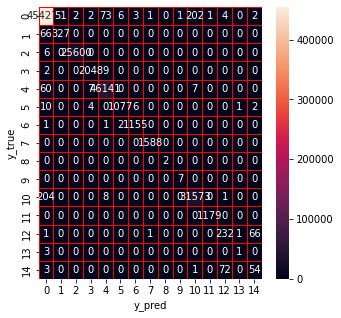

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [9]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9982760722000745
Precision of RF: 0.9982012517805925
Recall of RF: 0.9982760722000745
F1-score of RF: 0.9981915615960308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.85      0.46      0.60       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      0.99      2059
           4       0.99      1.00      1.00     46215
           5       1.00      0.99      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.71      0.83         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.72      0.79      0.75       301
          13       1.00      0.25      0.40         4
          14       0.39      0.27      0.32       

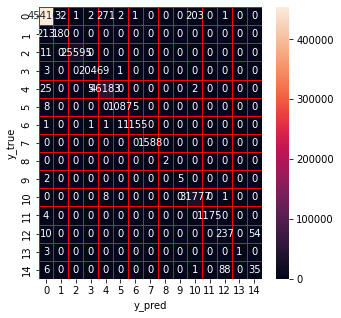

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [12]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9983873503265042
Precision of ET: 0.9983546022621328
Recall of ET: 0.9983873503265042
F1-score of ET: 0.99836530810193
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.87      0.74      0.80       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       1.00      0.99      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      0.99      0.99     31786
          11       1.00      0.99      1.00      1179
          12       0.75      0.79      0.77       301
          13       0.33      0.25      0.29         4
          14       0.45      0.35      0.39       13

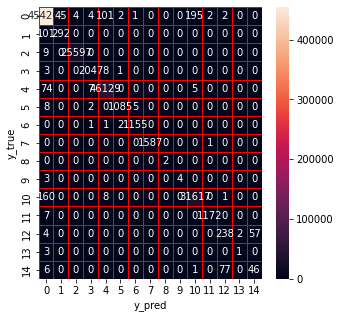

In [13]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [14]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

In [15]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees
0,0,0,0
1,2,2,2
2,0,0,0
3,0,0,0
4,0,0,0


In [16]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)


In [17]:
x_train = np.concatenate(( dt_train, et_train, rf_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test), axis=1)

Accuracy of Stacking: 0.9984650683830582
Precision of Stacking: 0.9984371934178721
Recall of Stacking: 0.9984650683830582
F1-score of Stacking: 0.9984385813663571
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.92      0.72      0.80       393
           2       1.00      1.00      1.00     25606
           3       0.96      1.00      0.98      2059
           4       1.00      1.00      1.00     46215
           5       1.00      0.99      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      1.00      0.99     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.79      0.77       301
          13       0.50      0.25      0.33         4
          14       0.45   

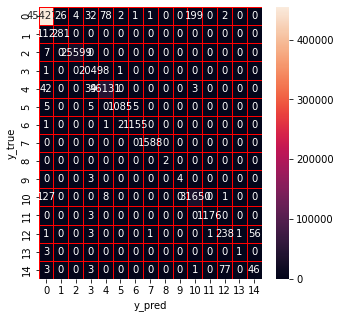

In [19]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#after

In [20]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_

In [21]:
avg_feature = (dt_feature + rf_feature + et_feature)/3

In [24]:
feature=(df.iloc[:,:77]).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 3), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.118, ' Bwd Packet Length Std'), (0.085, ' Average Packet Size'), (0.072, ' Packet Length Std'), (0.067, ' Destination Port'), (0.05, ' Fwd Packet Length Max'), (0.03, 'Init_Win_bytes_forward'), (0.029, ' PSH Flag Count'), (0.028, ' Bwd Packets/s'), (0.027, 'Bwd Packet Length Max'), (0.027, ' Avg Bwd Segment Size'), (0.026, ' Bwd Packet Length Mean'), (0.024, ' Packet Length Mean'), (0.022, ' Packet Length Variance'), (0.021, ' Flow IAT Mean'), (0.019, ' Max Packet Length'), (0.019, ' Flow IAT Max'), (0.018, ' Bwd Packet Length Min'), (0.016, ' Fwd Packet Length Mean'), (0.014, 'Total Length of Fwd Packets'), (0.014, ' Init_Win_bytes_backward'), (0.014, ' Fwd IAT Std'), (0.014, ' Fwd IAT Max'), (0.014, ' ACK Flag Count'), (0.013, 'Subflow Fwd Packets'), (0.013, 'Fwd Packets/s'), (0.013, ' Avg Fwd Segment Size'), (0.012, ' Idle Max'), (0.011, ' Subflow Fwd Bytes'), (0.011, ' Fwd IAT Mean'), (0.011, ' Flow IAT Std'), (0.01, ' act_data_pkt_fwd'), (0.01, 

In [25]:
f_list = sorted(zip(map(lambda x: round(x, 3), avg_feature), feature), reverse=True)

In [26]:
len(f_list)

77

In [27]:
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break 

In [28]:
X_fs = df[fs].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [30]:
X_train.shape

(2264594, 35)

In [31]:
pd.Series(y_train).value_counts()

0     1818477
4      184858
10     127144
2      102421
3        8234
7        6350
11       4718
6        4637
5        4399
1        1573
12       1206
14        522
9          29
13         17
8           9
dtype: int64

In [32]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500})

In [33]:
#X_train, y_train = smote.fit_resample(X_train, y_train)

ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 184858 samples and 1500 samples are asked.

In [ ]:
pd.Series(y_train).value_counts()

Accuracy of DT: 0.998385584007037
Precision of DT: 0.9983859558390122
Recall of DT: 0.998385584007037
F1-score of DT: 0.9983852234081466
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.83      0.83      0.83       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.98      0.99      1100
           6       0.99      1.00      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.70      1.00      0.82         7
          10       0.99      0.99      0.99     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.75      0.75       301
          13       0.33      0.50      0.40         4
          14       0.41      0.40      0.40       13

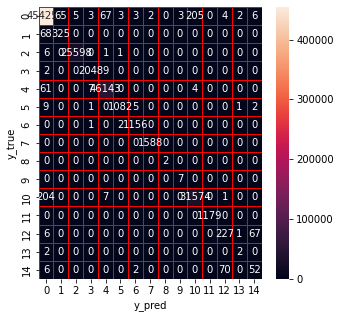

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [38]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9985480853980137
Precision of RF: 0.9984969400092869
Recall of RF: 0.9985480853980137
F1-score of RF: 0.9984882992246169
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.87      0.52      0.65       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       1.00      0.98      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.74      0.77      0.75       301
          13       1.00      0.25      0.40         4
          14       0.40      0.34      0.37       

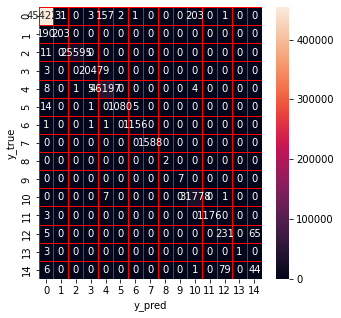

In [39]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [40]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.998320230186753
Precision of ET: 0.9982918046441138
Recall of ET: 0.998320230186753
F1-score of ET: 0.9983006276707554
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.86      0.74      0.80       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       1.00      0.98      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      0.99      0.99     31786
          11       1.00      0.99      1.00      1179
          12       0.74      0.76      0.75       301
          13       1.00      0.50      0.67         4
          14       0.41      0.35      0.37       13

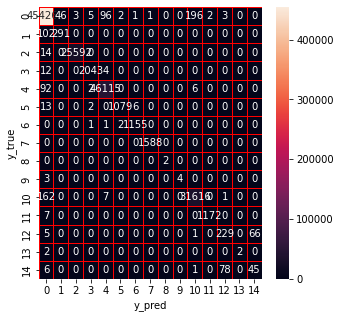

In [41]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [42]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

In [43]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel()
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees
0,0,0,0
1,2,2,2
2,0,0,0
3,0,0,0
4,0,0,0


In [44]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)

In [45]:
x_train = np.concatenate(( dt_train, et_train, rf_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test), axis=1)

Accuracy of Stacking: 0.9983873503265042
Precision of Stacking: 0.9983580013128387
Recall of Stacking: 0.9983873503265042
F1-score of Stacking: 0.998367521940887
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.86      0.74      0.80       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       1.00      0.98      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      1.00      0.99     31786
          11       1.00      1.00      1.00      1179
          12       0.73      0.76      0.75       301
          13       0.50      0.25      0.33         4
          14       0.41    

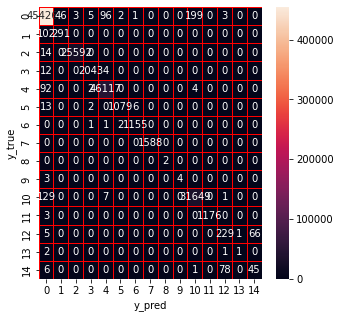

In [46]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()